In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import numpy as np
from dsn.train_dsn import train_dsn
from dsn.util.systems import linear_2D
from dsn.util.dsn_util import setup_IO
from dsn.util.plot_util import assess_constraints, plot_opt


# normalizing flow layer architecture
flow_type = 'PlanarFlowLayer'
# number of layers
nlayers = 10
flow_dict = {'latent_dynamics':None, \
             'TIF_flow_type':flow_type, \
             'repeats':nlayers, \
             'scale_layer':True}
# multivariate normal initialization variance
sigma_init = 1.0
random_seed = 1

# create an instance of the 2D linear system class, with free parameter A,
# tau = 1.0, and behavior of interest 'oscillation'.

fixed_params = {'tau':1.0};
behavior_str = 'oscillation'
system = linear_2D(fixed_params, behavior_str)


In [2]:
# Specify desired mean and variance for the real and imaginary
# components of the first eigenvalue.
f = 2.0; # 2 Hz
means = np.array([0.0, 2*np.pi*f])
variances = np.array([1.0, 1.0])
behavior = {'means':means, 'variances':variances}

# optimization hyperparams
batch_size = 1000;
c_init_order = -5
lr_order = -3


In [3]:
train_dsn(system, behavior, batch_size, flow_dict, \
          k_max=25, sigma_init=sigma_init, c_init_order=c_init_order, lr_order=lr_order,\
          random_seed=random_seed, min_iters=10000, max_iters=50000, \
          check_rate=100, dir_str='test')

initdir results/inits/D=4_M_10P_sigma=1.00_rs=1/
results/inits/D=4_M_10P_sigma=1.00_rs=1/final_theta.npz
training NF
0 <tf_util.flows.ElemMultLayer object at 0x1a2b060fd0>
1 <tf_util.flows.PlanarFlowLayer object at 0x109e17cf8>
2 <tf_util.flows.PlanarFlowLayer object at 0x109e17ac8>
3 <tf_util.flows.PlanarFlowLayer object at 0x109e17cc0>
4 <tf_util.flows.PlanarFlowLayer object at 0x109e17f28>
5 <tf_util.flows.PlanarFlowLayer object at 0x109e17d30>
6 <tf_util.flows.PlanarFlowLayer object at 0x109e17a90>
7 <tf_util.flows.PlanarFlowLayer object at 0x1a2b0569b0>
8 <tf_util.flows.PlanarFlowLayer object at 0x1a2b0564a8>
9 <tf_util.flows.PlanarFlowLayer object at 0x1a2b1dd588>
10 <tf_util.flows.PlanarFlowLayer object at 0x1a2b1dd630>
Making directory results/inits/D=4_M_10P_sigma=1.00_rs=1/
0 ScalarFlow_Layer_1
1 PlanarFlow_Layer2
2 PlanarFlow_Layer3
3 PlanarFlow_Layer4
4 PlanarFlow_Layer5
5 PlanarFlow_Layer6
6 PlanarFlow_Layer7
7 PlanarFlow_Layer8
8 PlanarFlow_Layer9
9 PlanarFlow_Layer10
10 

/Users/sbittner/anaconda/envs/dsn/lib/python3.6/site-packages/tensorflow-1.12.0rc2-py3.6-macosx-10.7-x86_64.egg/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


array_init_len 626
model entropy / true entropy
3.44E-01 / 5.68E+00
Starting NF optimization.
******************************************
results/inits/D=4_M_10P_sigma=1.00_rs=1/
it = 100 
model entropy / true entropy
2.58E+00 / 5.68E+00
train elbo: 1.999124
train R2: 0.541546
iter 101 took 0.011057 seconds


KeyboardInterrupt: 

/Users/sbittner/Documents/dsn/dsn/util/plot_util.py:22: RuntimeWarning: invalid value encountered in greater
  con_sat = np.prod(p_values[i,j,:] > alpha);
No handles with labels found to put in legend.


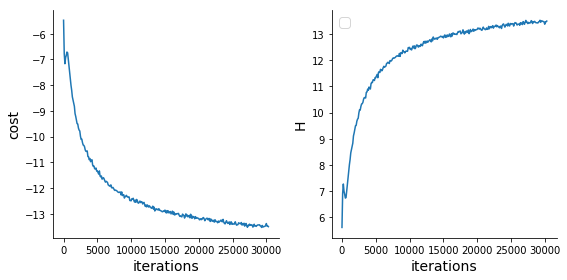

rows cols
1 4


TypeError: object of type 'AxesSubplot' has no len()

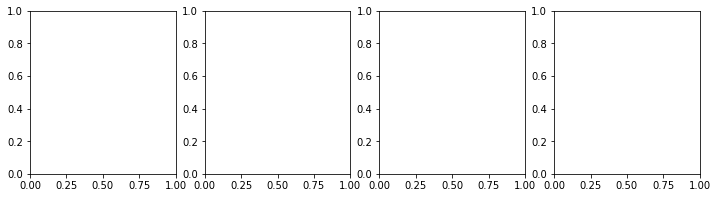

In [2]:
basedir = os.getcwd()
savedir = basedir + '/' + setup_IO(system, flow_dict, \
                                   sigma_init, lr_order, \
                                   c_init_order, random_seed, 
                                   dir_str='test')
fname = savedir + 'results.npz'
plot_opt([fname], [''])

In [27]:
alpha = 0.05
p_values, AL_final_its = assess_constraints([fname], alpha, k_max, mu, system.num_suff_stats)
labels = [r'$a_1$', r'$a_2$', r'$a_3$', r'$a_4$']
plot_zs([fname], system.D, labels, [''], AL_final_its, fontsize=20)

 has not converged so not plotting.


[]